### Overview:
This code implements one of the multiple ways of multi-model RAG. This project processes a PDF file, retrieves relevant content using Colpali, and generates answers using a multi-modal RAG system. The process includes document indexing, querying, and summarizing with the Gemini model.

### Key Components:
- **RAGMultiModalModel**: Used for document indexing and retrieval.
- **PDF Processing**: Downloads and processes "Attention is All You Need" paper.
- **Gemini Model**: Used for content generation from retrieved images and queries.
- **Base64 Encoding/Decoding**: Manages image data retrieved during search.

### Diagram:
   <img src="../images/multi_model_rag_with_colpali.svg" alt="Reliable-RAG" width="300">

### Motivation:
To enable efficient querying and content generation from multi-modal documents (PDFs with text and images) in response to natural language queries.

### Method Details:
- Indexing: The PDF is indexed using the `RAGMultiModalModel`, storing both text and image data.
- Querying: Natural language queries retrieve relevant document segments.
- Image Processing: Images from the document are decoded, displayed, and used in conjunction with the Gemini model to generate content.

### Benefits:
- Multi-modal support for both text and images.
- Streamlined retrieval and summarization pipeline.
- Flexible content generation using advanced LLMs (Gemini model).

### Implementation:
- PDF is indexed, and the content is split into text and image segments.
- A query is run against the indexed document to fetch the relevant results.
- Retrieved image data is decoded and passed through the Gemini model for answer generation.

### Summary:
This project integrates document indexing, retrieval, and content generation in a multi-modal setting, enabling efficient queries on complex documents like research papers.

## Setup


In [ ]:
!pip install -q byaldi
!sudo apt-get install -y poppler-utils # for windows - https://stackoverflow.com/questions/18381713/how-to-install-poppler-on-windows

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git qwen-vl-utils flash-attn optimum auto-gptq bitsandbytes

### Imports

In [ ]:
import base64
import os
os.environ["HF_token"] = 'your-huggingface-api-key' # to download the ColPali model
from byaldi import RAGMultiModalModel

In [ ]:
RAG = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2", verbose=1)

### Download the "Attention is all you need" paper

In [ ]:
!wget https://arxiv.org/pdf/1706.03762
!mkdir docs
!mv 1706.03762 docs/attention_is_all_you_need.pdf

--2024-09-20 12:36:38--  https://arxiv.org/pdf/1706.03762
Resolving arxiv.org (arxiv.org)... 151.101.3.42, 151.101.131.42, 151.101.67.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.3.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘1706.03762’

1706.03762          100%[===================>]   2.11M  --.-KB/s    in 0.01s   

2024-09-20 12:36:38 (164 MB/s) - ‘1706.03762’ saved [2215244/2215244]



### Indexing

In [ ]:
RAG.index(
    input_path="./docs/attention_is_all_you_need.pdf",
    index_name="attention_is_all_you_need",
    store_collection_with_index=True, # set this to false if you don't want to store the base64 representation
    overwrite=True
)

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Index exported to .byaldi/attention_is_all_you_need
Index exported to .byaldi/attention_is_all_you_need


{0: 'docs/attention_is_all_you_need.pdf'}

### Query time

In [ ]:
query = "What is the BLEU score of the Transformer (base model)?"

In [ ]:
results = RAG.search(query, k=1)

### Actual image data

In [ ]:
image_bytes = base64.b64decode(results[0].base64)

In [ ]:
filename = 'image.jpg'  # I assume you have a JPG file
with open(filename, 'wb') as f:
  f.write(image_bytes)

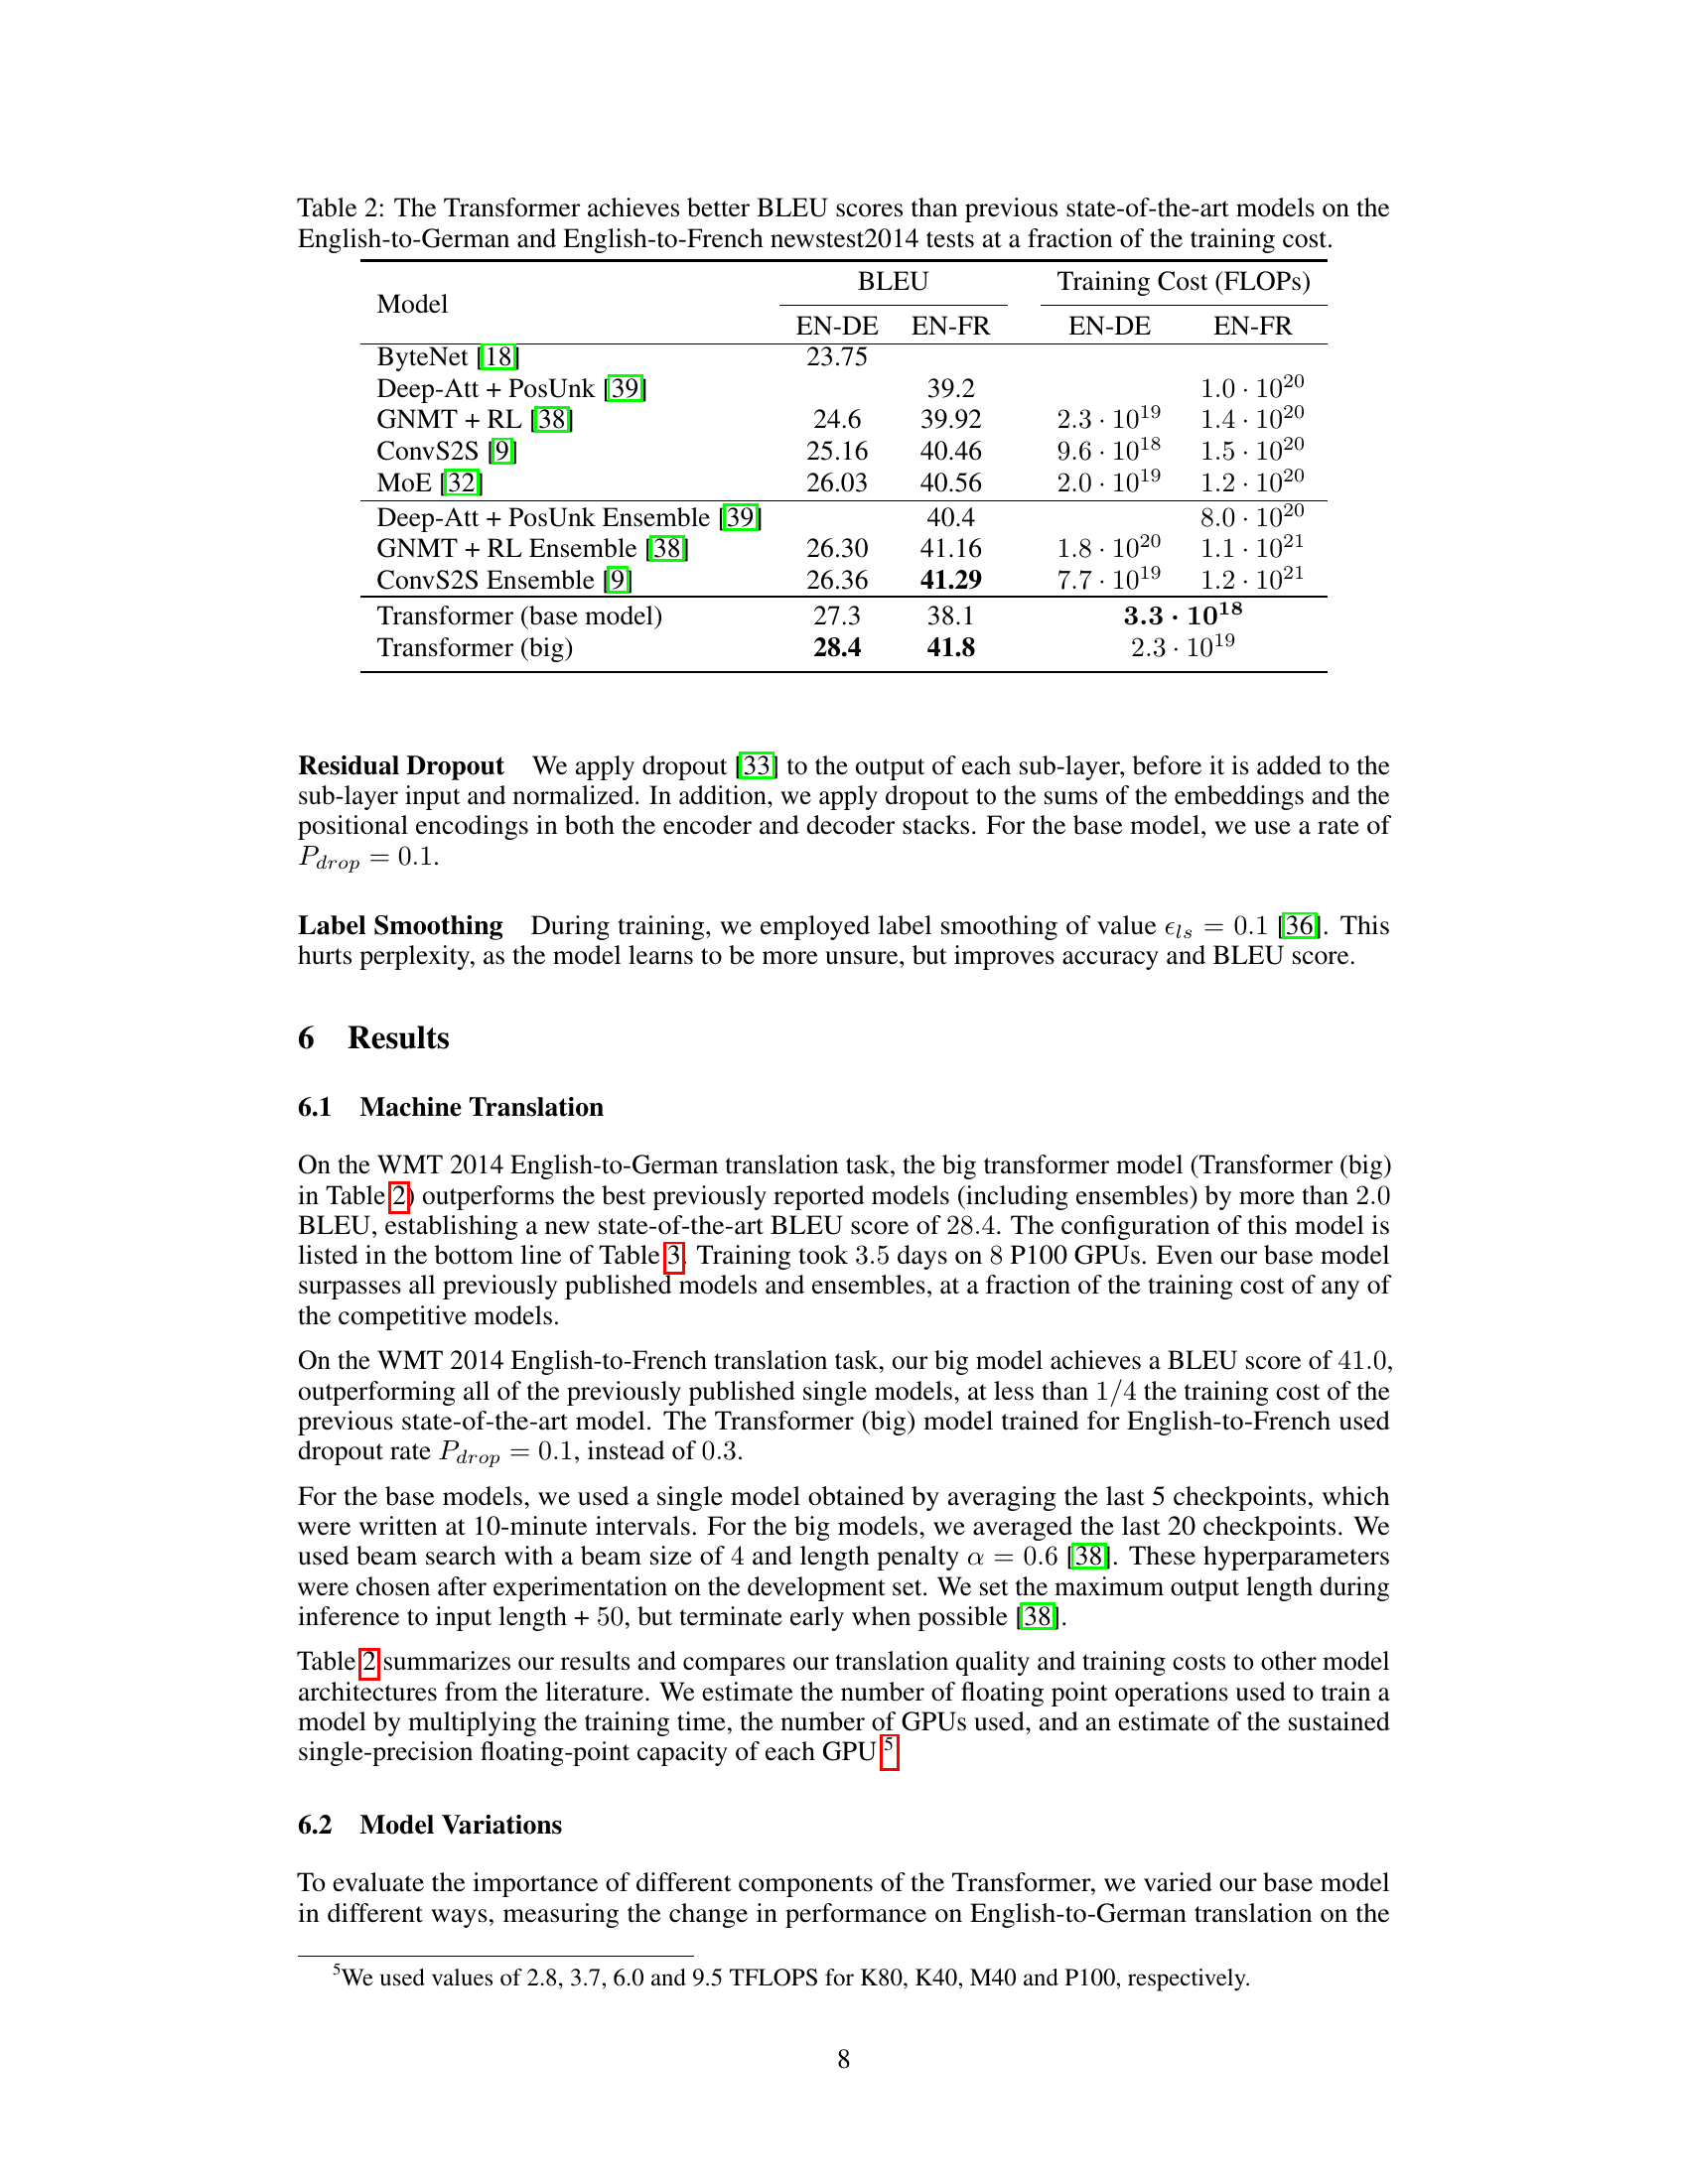

In [ ]:
from IPython.display import Image

display(Image(filename))

## Test using gemini-1.5-flash

In [ ]:
import google.generativeai as genai

genai.configure(api_key='your-api-key')
model = genai.GenerativeModel(model_name="gemini-1.5-flash")

In [ ]:
from PIL import Image
image = Image.open(filename)

In [ ]:
response = model.generate_content([image, query])
print(response.text)

The BLEU score of the Transformer (base model) is 27.3.
